In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def extract_answer(text):
    try:
        text_processed = text.split('"answer":')[-1].split('\n')[0].strip().split('"')[1].strip()
    except:
        text_processed = text.split('"answer":')[-1].split('\n')[0].strip()
    return text_processed

def correct_paranthesis_split(text):
    try:
        text_processed = text.split('"answer":')[-1].split("\n")[1].split(":")[-1].split('"')[1].strip()
        return text_processed
    except:
        return text
    


In [3]:
# PROMPT_RESPONSE_PATH = "../../../data/analysis_results/Llama_2_13b_chat_hf_prompt_based_two_hop_mcq_from_monarch_and_robokop_response.csv"
# RAG_RESPONSE_PATH = "../../../data/analysis_results/Llama_2_13b_chat_hf_PubMedBert_entity_recognition_based_node_retrieval_rag_based_two_hop_mcq_from_monarch_and_robokop_response.csv"

PROMPT_RESPONSE_PATH = "../../../data/analysis_results/gpt_35_turbo_prompt_based_two_hop_mcq_from_monarch_and_robokop_response.csv"
RAG_RESPONSE_PATH = "../../../data/analysis_results/gpt_35_turbo_PubMedBert_entity_recognition_based_node_retrieval_rag_based_two_hop_mcq_from_monarch_and_robokop_response.csv"

# PROMPT_RESPONSE_PATH = "../../../data/analysis_results/Llama_2_13b_chat_hf_prompt_based_two_hop_mcq_from_robokop_response.csv"
# RAG_RESPONSE_PATH = "../../../data/analysis_results/Llama_2_13b_chat_hf_node_retrieval_rag_based_two_hop_mcq_from_robokop_response.csv"


In [4]:
prompt_response_df = pd.read_csv(PROMPT_RESPONSE_PATH)
rag_response_df = pd.read_csv(RAG_RESPONSE_PATH)

prompt_response_df.loc[:, 'extracted_answer'] = prompt_response_df['llm_answer'].apply(extract_answer)
rag_response_df.loc[:, 'extracted_answer'] = rag_response_df['llm_answer'].apply(extract_answer)

prompt_response_df_paranthesis_split = prompt_response_df[prompt_response_df.extracted_answer=="{"]
if prompt_response_df_paranthesis_split.shape[0] > 0:
    prompt_response_df_paranthesis_split.loc[:, "extracted_answer"] = prompt_response_df_paranthesis_split.llm_answer.apply(correct_paranthesis_split)
    prompt_response_df_wo_paranthesis_split = prompt_response_df[prompt_response_df.extracted_answer != "{"]
    prompt_response_df = pd.concat([prompt_response_df_wo_paranthesis_split, prompt_response_df_paranthesis_split])

rag_response_df_paranthesis_split = rag_response_df[rag_response_df.extracted_answer=="{"]
if rag_response_df_paranthesis_split.shape[0] > 0:
    rag_response_df_paranthesis_split.loc[:, "extracted_answer"] = rag_response_df_paranthesis_split.llm_answer.apply(correct_paranthesis_split)
    rag_response_df_wo_paranthesis_split = rag_response_df[rag_response_df.extracted_answer != "{"]
    rag_response_df = pd.concat([rag_response_df_wo_paranthesis_split, rag_response_df_paranthesis_split])

# prompt_response_df = prompt_response_df[~prompt_response_df.correct_answer.str.contains("ClinVarVariant")].reset_index()
# rag_response_df = rag_response_df[~rag_response_df.correct_answer.str.contains("ClinVarVariant")].reset_index()

# prompt_response_df = prompt_response_df[prompt_response_df.extracted_answer != "None"]
# rag_response_df = rag_response_df[rag_response_df.extracted_answer != "None"]


/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_5499/3236974353.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rag_response_df_paranthesis_split.loc[:, "extracted_answer"] = rag_response_df_paranthesis_split.llm_answer.apply(correct_paranthesis_split)


In [17]:
prompt_response_df[prompt_response_df.correct_answer != prompt_response_df.extracted_answer].head(50)
# prompt_response_df.iloc[23].question

,question,correct_answer,llm_answer,extracted_answer
7,"Out of the given list, which Gene is associate...",HLA-DQA1,"{\n ""answer"": ""IL2RA""\n}",IL2RA
11,"Out of the given list, which Gene is associate...",EPDR1,"{\n ""answer"": ""IL23R""\n}",IL23R
13,"Out of the given list, which Gene is associate...",TLR1,"{\n ""answer"": ""HLA-DPA1""\n}",HLA-DPA1
15,"Out of the given list, which Gene is associate...",ABO,"{\n ""answer"": ""JAK2""\n}",JAK2
23,"Out of the given list, which Gene is associate...",TERT,"{\n ""answer"": ""IL23R""\n}",IL23R
25,"Out of the given list, which Gene is associate...",TERT,"{\n ""answer"": ""ERAP1""\n}",ERAP1
27,"Out of the given list, which Gene is associate...",TERT,"{\n ""answer"": ""STAT3""\n}",STAT3
28,"Out of the given list, which Gene is associate...",TERT,"{\n ""answer"": ""YLPM1""\n}",YLPM1
29,"Out of the given list, which Gene is associate...",TERT,"{\n ""answer"": ""ATG5""\n}",ATG5
31,"Out of the given list, which Gene is associate...",TERT,"{\n ""answer"": ""ATXN2""\n}",ATXN2


In [232]:
# prompt_response_df.loc[:, "total_ans"] = prompt_response_df.extracted_answer.apply(lambda x:len(x.split(",")))
# prompt_response_df[prompt_response_df.total_ans > 1]


In [233]:
# def evaluate_2(df):
#     total_questions = df.shape[0]
#     df.loc[:, "total_ans"] = df.extracted_answer.apply(lambda x:len(x.split(",")))
#     df_multiple_answers = df[df.total_ans == 2]
#     df = df.drop(df_multiple_answers.index)
#     df_multiple_answers.loc[:, 'extracted_answer'] = df_multiple_answers['extracted_answer'].str.split(',').apply(lambda lst: [s.strip() for s in lst])
#     df_multiple_answers_correct_answers = df_multiple_answers[df_multiple_answers.apply(lambda row: row['correct_answer'] in row['extracted_answer'], axis=1)]
#     correct_1 = df[df.correct_answer == df.extracted_answer].shape[0]
#     correct_2 = df_multiple_answers_correct_answers.shape[0]
#     incorrect_1 = df[df.correct_answer != df.extracted_answer].shape[0]
#     incorrect_2 = df_multiple_answers_correct_answers.shape[0] - correct_2
#     correct_frac = (correct_1 + correct_2)/total_questions
#     incorrect_frac = (incorrect_1 + incorrect_2)/total_questions
#     return correct_frac, incorrect_frac

# evaluate_2(prompt_response_df)


In [234]:
def evaluate(df):
    correct = df[df.correct_answer == df.extracted_answer]
    incorrect = df[df.correct_answer != df.extracted_answer]
    correct_frac = correct.shape[0]/df.shape[0]
    incorrect_frac = incorrect.shape[0]/df.shape[0]
    return correct_frac, incorrect_frac

niter = 1000
nsample = 150

prompt_correct_frac_list = []
rag_correct_frac_list = []
for i in tqdm(range(niter)):
    prompt_response_df_sample = prompt_response_df.sample(n=nsample, random_state=i)
    prompt_correct_frac, prompt_incorrect_frac = evaluate(prompt_response_df_sample)

    rag_response_df_sample = rag_response_df.iloc[prompt_response_df_sample.index]
    rag_correct_frac, rag_incorrect_frac = evaluate(rag_response_df_sample)

    prompt_correct_frac_list.append(prompt_correct_frac)
    rag_correct_frac_list.append(rag_correct_frac)


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1430.82it/s]


/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_20414/1464004724.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prompt_correct_frac_list, color="blue", shade=True, label="Prompt based", ax=ax, lw=2, linestyle="-", alpha=0.6)
/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_20414/1464004724.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rag_correct_frac_list, color="lightcoral", shade=True, label="KG-RAG based", ax=ax, lw=2, linestyle="-", alpha=0.6)


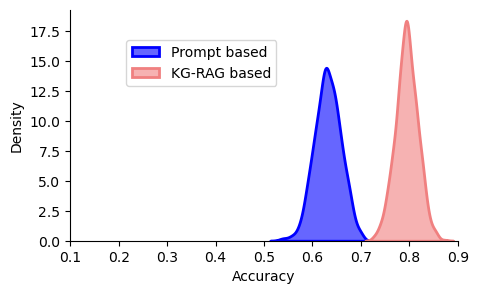

In [235]:

# Create a figure and axis
fig = plt.figure(figsize=(5, 3))
ax = plt.gca()

# Plot KDEs with the specified styling
sns.kdeplot(prompt_correct_frac_list, color="blue", shade=True, label="Prompt based", ax=ax, lw=2, linestyle="-", alpha=0.6)
sns.kdeplot(rag_correct_frac_list, color="lightcoral", shade=True, label="KG-RAG based", ax=ax, lw=2, linestyle="-", alpha=0.6)

# Set the outline color to black
for artist in ax.lines:
    artist.set_edgecolor("black")

# Add labels and legend
plt.xlabel("Accuracy")
plt.ylabel("Density")
# plt.legend(bbox_to_anchor=(1.01, 0.9))
plt.legend(bbox_to_anchor=(0.55, 0.9))
plt.xlim(0.1,0.9)
# plt.legend(loc='upper left')

sns.despine(top=True, right=True)

# Show the plot
plt.show()

# figure_folder_name = "GPT/entity_recognition_based"
# fig_filename = "../../../data/analysis_results/figures/{}/gpt_4_two_hop_MONARCH_ROBOKOP_combined_mcq_llm_performance.svg".format(figure_folder_name)
# fig.savefig(fig_filename, format='svg', bbox_inches='tight')


In [197]:
np.std(rag_correct_frac_list)


0.0259921141887304

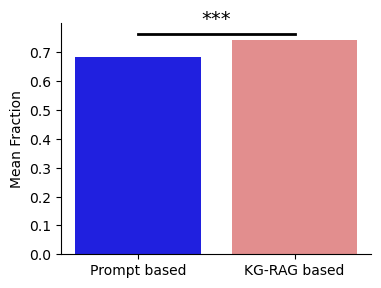

In [52]:


# Perform a t-test
t_stat, p_value = stats.ttest_ind(prompt_correct_frac_list, rag_correct_frac_list)

# Create a figure and axis
plt.figure(figsize=(4, 3))
ax = plt.gca()

# Create bar plot with error bars
sns.barplot(x=["Prompt based", "KG-RAG based"], y=[np.mean(prompt_correct_frac_list), np.mean(rag_correct_frac_list)], errorbar="sd", palette=["blue", "lightcoral"], ax=ax)

# Calculate the height for the text and line
height = max(np.mean(prompt_correct_frac_list), np.mean(rag_correct_frac_list)) + 0.02

# Add a horizontal line between the two bars
ax.plot([0, 1], [height, height], c="black", lw=2)

# Add text annotation for significance
if p_value > 0.05:
    annotation = "ns"
elif 0.001 < p_value <= 0.05:
    annotation = "*"
else:
    annotation = "***"

# Add the annotation text above the line
plt.text(0.5, height + 0.02, annotation, ha='center', va='bottom', fontsize=14)

# Add labels
plt.ylabel("Mean Fraction")

sns.despine(top=True, right=True)

# Show the plot
plt.show()


In [53]:
p_value

0.0

In [815]:
len(prompt_correct_frac_list)

1000

In [227]:
gpt4_rag_correct_frac_list = rag_correct_frac_list

In [236]:
t_stat, p_value = stats.ttest_ind(gpt4_rag_correct_frac_list, rag_correct_frac_list)

In [237]:
p_value

0.0

In [238]:
t_stat

-47.702914181598494

In [239]:
len(gpt4_rag_correct_frac_list)

1000

In [240]:
len(rag_correct_frac_list)

1000